In [34]:
import metawear_db
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
db = metawear_db.db_metawear()

In [25]:
df = pd.read_sql("""
SELECT * FROM metawear_raw
""", db.connection)

df.head()

,epoch,activity,x,y,z,run_id
0,1551479061758,pi-startup-Mar1-31seconds,0.026,0.061,1.016,1551479056
1,1551479061768,pi-startup-Mar1-31seconds,0.026,0.060,1.015,1551479056
2,1551479061778,pi-startup-Mar1-31seconds,0.026,0.060,1.017,1551479056
3,1551479061787,pi-startup-Mar1-31seconds,0.025,0.063,1.018,1551479056
4,1551479061797,pi-startup-Mar1-31seconds,0.025,0.060,1.017,1551479056


In [29]:
def epoch_to_sec_id(row):
    """
    Creates the sec_id field used to perform machine learning. 
    This field is HourMinuteSecond converted to a string parsed from the epoch gathered 
    from the metawear sensor during data collection.
    """
    timestamp = row['epoch'][0:10]
    timestamp =  datetime.fromtimestamp(int(timestamp))
    return timestamp.strftime('%H%M%S')

In [46]:
df['sec_id'] = df.apply(epoch_to_sec_id, axis=1)
df

,epoch,activity,x,y,z,run_id,timestamp,sec_id
0,1551479061758,pi-startup-Mar1-31seconds,0.026,0.061,1.016,1551479056,162421,162421
1,1551479061768,pi-startup-Mar1-31seconds,0.026,0.060,1.015,1551479056,162421,162421
2,1551479061778,pi-startup-Mar1-31seconds,0.026,0.060,1.017,1551479056,162421,162421
3,1551479061787,pi-startup-Mar1-31seconds,0.025,0.063,1.018,1551479056,162421,162421
4,1551479061797,pi-startup-Mar1-31seconds,0.025,0.060,1.017,1551479056,162421,162421
5,1551479061807,pi-startup-Mar1-31seconds,0.024,0.059,1.015,1551479056,162421,162421
6,1551479061818,pi-startup-Mar1-31seconds,0.024,0.061,1.018,1551479056,162421,162421
7,1551479061828,pi-startup-Mar1-31seconds,0.025,0.060,1.017,1551479056,162421,162421
8,1551479061838,pi-startup-Mar1-31seconds,0.025,0.061,1.016,1551479056,162421,162421
9,1551479061848,pi-startup-Mar1-31seconds,0.025,0.060,1.016,1551479056,162421,162421


In [55]:
def build_ndarray(df):
    """
    Creates the base numpy ndarray for machine learning from a given 
    pandas DataFrame. This DataFrame must include X, Y, Z values and a sec_id.
    """
    df_filtered = df.filter(items=('sec_id', 'x', 'y', 'z'))
    n_arr = df_filtered.values
    return n_arr

In [59]:
arr = build_ndarray(df)
arr

array([['162421', 0.026, 0.061, 1.016],
       ['162421', 0.026, 0.06, 1.015],
       ['162421', 0.026, 0.06, 1.017],
       ...,
       ['170633', -0.024, 0.104, 1.043],
       ['170633', -0.024, 0.033, 0.952],
       ['170633', 0.063, 0.07, 1.046]], dtype=object)

In [31]:
# roomba = df[ df['activity'] == 'pi-roomba-supervised-Mar3-33seconds' ]
roomba = df[ df['run_id']=='1551654348' ]

43028    1551654348
Name: run_id, dtype: object


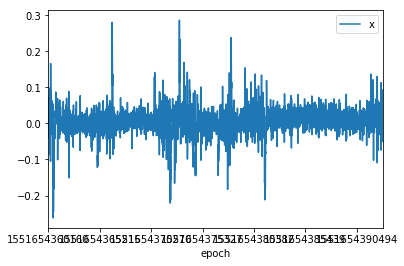

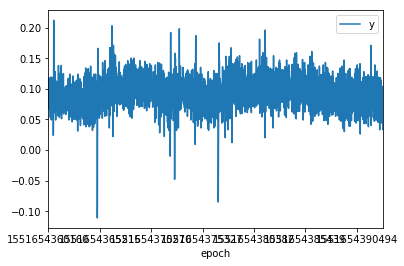

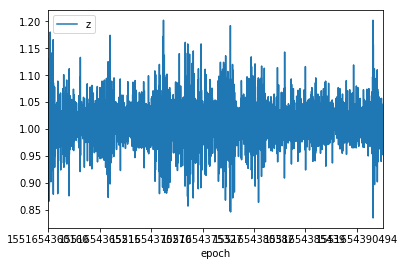

In [33]:
print(roomba['run_id'].drop_duplicates())
roomba.plot(x='epoch', y='x')
roomba.plot(x='epoch', y='y')
roomba.plot(x='epoch', y='z')